The CRISP-DM Process (Cross Industry Process for Data Mining).

### 1. Business Understanding

1. What is the hottest job?

### 2. Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/developer_survey_2018/survey_results_public.csv')
schema = pd.read_csv('./data/developer_survey_2018/survey_results_schema.csv')

df.head()

/Users/fc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [3]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Randomized respondent ID number (not in order of survey response time)'

In [4]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print('there are {} rows in the dataset!'.format(num_rows))
print('there are {} rows in the dataset!'.format(num_cols))

there are 98855 rows in the dataset!
there are 129 rows in the dataset!


In [5]:
no_nulls = set(df.columns[df.isnull().mean()==0]) 
print('no missing value columns: {}'.format(no_nulls))

no missing value columns: {'Hobby', 'OpenSource', 'Respondent'}


In [6]:
for no_null in no_nulls:
    print('{}: {}'.format(no_null, get_description(no_null)))

Hobby: Do you code as a hobby?
OpenSource: Do you contribute to open source projects?
Respondent: Randomized respondent ID number (not in order of survey response time)


In [7]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
print('most missing value columns: {}'.format(most_missing_cols))

most missing value columns: {'MilitaryUS', 'TimeAfterBootcamp'}


In [8]:
for most_missing_col in most_missing_cols:
    print('{}: {}'.format(most_missing_col, get_description(most_missing_col)))

MilitaryUS: Are you currently serving or have you ever served in the U.S. Military?
TimeAfterBootcamp: You indicated previously that you went through a developer training program or bootcamp. How long did it take you to get a full-time job as a developer after graduating?


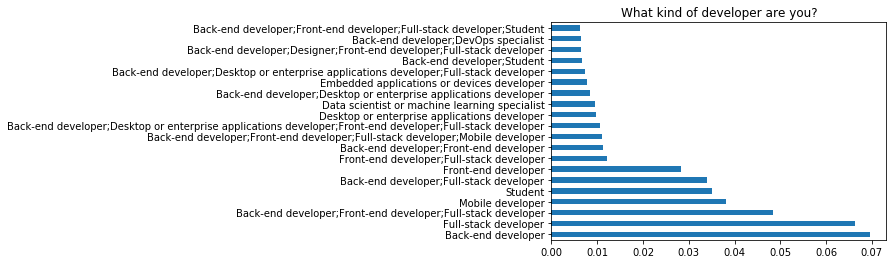

In [9]:
devtype_vals = df.DevType.value_counts()

(devtype_vals[:20]/devtype_vals.sum()).plot(kind="barh");
plt.title("What kind of developer are you?");

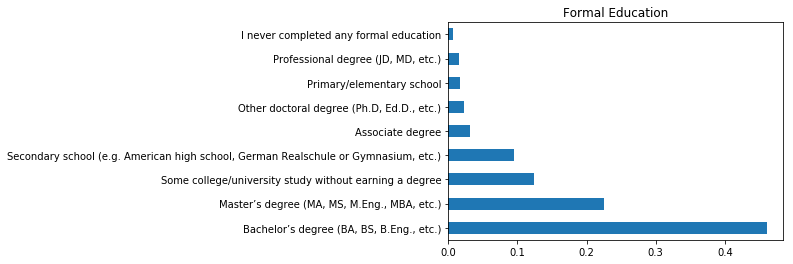

In [10]:
ed_vals = df.FormalEducation.value_counts()

(ed_vals/ed_vals.sum()).plot(kind="barh");
plt.title("Formal Education");

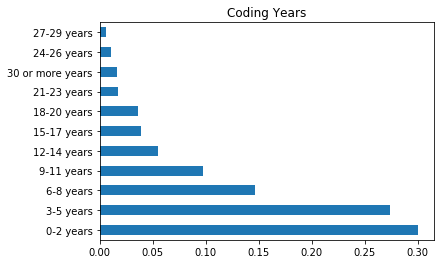

In [11]:
year_vals = df.YearsCodingProf.value_counts()

(year_vals/year_vals.sum()).plot(kind="barh");
plt.title("Coding Years");

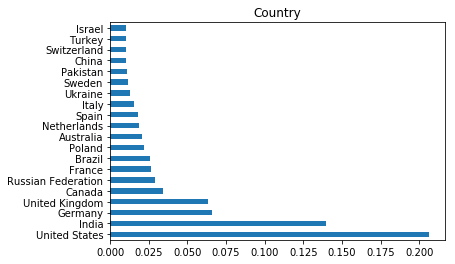

In [12]:
country_vals = df.Country.value_counts()

(country_vals[:20]/country_vals.sum()).plot(kind="barh");
plt.title("Country");

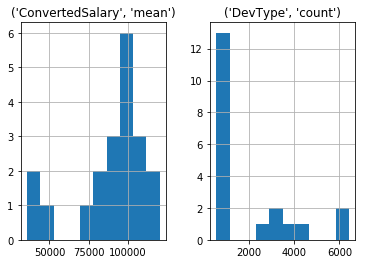

In [13]:
df.groupby('DevType').agg({'DevType': ['count'], 'ConvertedSalary': ['mean']}).sort_values([('DevType', 'count')])[-20:].hist()
plt.show()

### 3. Prepare Data

In [14]:
cat_df = df.select_dtypes(include=['object'])

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

87

In [15]:
multiple_selection = ['DevType'
                        , 'LanguageWorkedWith'
                        , 'DatabaseWorkedWith'
                        , 'PlatformWorkedWith'
                        , 'FrameworkWorkedWith'
                        , 'IDE'
                        , 'Methodology'
                        , 'VersionControl'
                        , 'LanguageDesireNextYear'
                        , 'DatabaseDesireNextYear'
                        , 'PlatformDesireNextYear'
                        , 'FrameworkDesireNextYear'
                        , 'CommunicationTools'
                        , 'EducationTypes'
                        , 'SelfTaughtTypes'
                        , 'HackathonReasons'
                        , 'AdBlockerReasons'
                        , 'AdsActions'
                        , 'ErgonomicDevices'
                        , 'Gender'
                        , 'SexualOrientation'
                        , 'RaceEthnicity']

In [16]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            if col in multiple_selection:
                dummy_s = df[col].str.split(";")
                dummy_df = pd.get_dummies(dummy_s.apply(pd.Series).stack(), prefix=col, prefix_sep='_', dummy_na=dummy_na).sum(level=0)
            else:
                dummy_df = pd.get_dummies(df[col], prefix=col, prefix_sep='_', dummy_na=dummy_na)
            
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), dummy_df], axis=1)
        except:
            continue

    return df

In [17]:
df_drop = df.drop(['Respondent', 'CurrencySymbol', 'Salary'], axis=1)

df_new = create_dummy_df(df_drop, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show shape to assure it has a shape of (5009, 11938)
print(df_new.shape)

(98855, 887)


In [18]:
df_new.head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,MilitaryUS_No,MilitaryUS_Yes,SurveyTooLong_The survey was an appropriate length,SurveyTooLong_The survey was too long,SurveyTooLong_The survey was too short,SurveyEasy_Neither easy nor difficult,SurveyEasy_Somewhat difficult,SurveyEasy_Somewhat easy,SurveyEasy_Very difficult,SurveyEasy_Very easy
0,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,...,0,0,1,0,0,0,0,0,0,1
1,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,...,0,0,1,0,0,0,0,1,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,0,1,0,0
4,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0,...,0,0,1,0,0,0,0,1,0,0


In [19]:
df_new.to_pickle('./data/survey_results_public_cat.p')

### 4. Model Data

In [20]:
df_new = pd.read_pickle('./data/survey_results_public_cat.p')

print(df_new.shape)

(98855, 887)


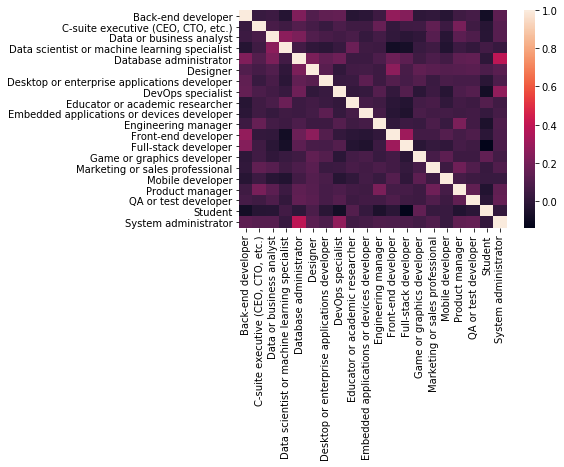

In [21]:
devtype = [col for col in df_new if col.startswith('DevType_')]
devtype_df = df_new[devtype]

sns.heatmap(devtype_df.corr(), xticklabels=[dt[8:] for dt in devtype_df.columns], yticklabels=[dt[8:] for dt in devtype_df.columns]);

### 5. Results

In [22]:
dt_salary_df = df_new[df_new['ConvertedSalary'] > 0]
dt_salary_df = dt_salary_df[devtype + ['ConvertedSalary']]

dt_salary_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator,ConvertedSalary
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70841.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,21426.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41671.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120000.0
8,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,250000.0


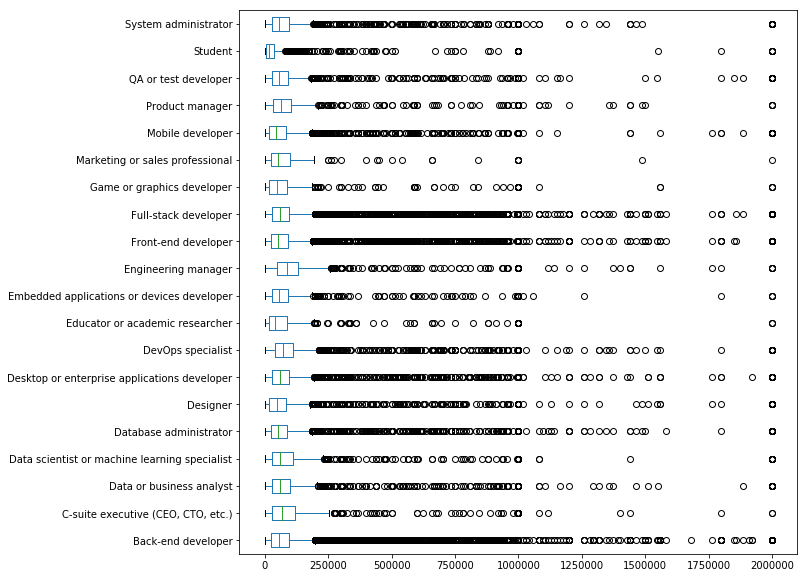

In [23]:
box_df = pd.DataFrame()
for dt in devtype:
    box_df[dt] = dt_salary_df[dt_salary_df[dt] == 1]['ConvertedSalary']

box_df.columns = box_df.columns.str.slice(8)
box_df.plot.box(vert=False, figsize=(10,10))
plt.show()

In [24]:
yn_salary_df = pd.DataFrame(columns=['0', '1', 'diff'], index=devtype)

for dt in devtype:
    yn_salary_df.loc[dt]['0'] = dt_salary_df[dt_salary_df[dt] == 0]['ConvertedSalary'].mean()
    yn_salary_df.loc[dt]['1'] = dt_salary_df[dt_salary_df[dt] == 1]['ConvertedSalary'].mean()
    yn_salary_df.loc[dt]['diff'] = yn_salary_df.loc[dt]['1'] - yn_salary_df.loc[dt]['0']

yn_salary_df.columns=['No', 'Yes', 'Diff_Salary']
yn_salary_df.index = yn_salary_df.index.str.slice(8)
yn_salary_df.sort_values(by='Yes', inplace=True)
yn_salary_df.style.bar(subset=['Diff_Salary'], align='mid', color=['#d65f5f', '#5fba7d'])


,No,Yes,Diff_Salary
Student,102033,49758.6,-52274.9
Educator or academic researcher,97790.3,85666.7,-12123.6
Mobile developer,100093,85940.6,-14152.6
Game or graphics developer,97641.7,90131.9,-7509.85
Designer,97960.9,92658.2,-5302.69
Front-end developer,97786.1,96680.1,-1105.99
Embedded applications or devices developer,97382.2,96879.9,-502.333
QA or test developer,97366.9,97199.8,-167.052
Desktop or enterprise applications developer,97320.8,97499.4,178.624
Back-end developer,96396.8,97954.9,1558.07


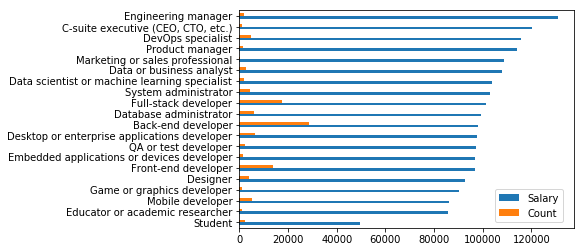

In [25]:
sort_box_df = pd.DataFrame(data={'ConvertedSalary': yn_salary_df['Yes'], 'Count': box_df.count()})
sort_box_df.sort_values(by='ConvertedSalary', inplace=True)
sort_box_df.columns = sort_box_df.columns.str.slice(-6)
sort_box_df.plot(kind='barh').legend(bbox_to_anchor=(.75, .2))
plt.show()

### 6. Deploy

From the result, we can found that manger level shuld have the best salary. So, if you would like to get the most salary, maybe its time to think about how to become a manager.